# Limpieza y Completado de datos relevantes
## Proyecto Final

**Equipo:**
* Malváez Flores Axel Daniel
* Peralta Rionda Gabriel Zadquiel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos los dos data sets

staff = pd.read_csv('./TablasCleaned_2/baStaff_cleaned.csv')
stock = pd.read_csv('./TablasCleaned_2/baStock_cleaned.csv')
invoices = pd.read_csv('./TablasCleaned_2/baInvoices_cleaned.csv')
invoicesItems = pd.read_csv('./TablasCleaned_2/baInvoicesItems_cleaned.csv')

## InvoicesItems

In [3]:
invoicesItems

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total,CostPrice,LineNbr
0,1,1,5,de la rosa bianchi grande 45pz,29.000,29.0,22.50000,1
1,2,2,78,reyma 7oz vaso plastico 50pz,30.000,30.0,23.40000,1
2,3,2,66,classy cuchara pastelera 50pz,13.000,13.0,8.83000,2
3,4,3,2568,macma deju 280gr,61.000,61.0,48.60000,1
4,5,4,732,macma escoces 330gr,57.000,57.0,45.49000,1
...,...,...,...,...,...,...,...,...
50308,50310,28750,228,12x25 celofan adhesivo 100pz,43.000,43.0,27.00000,1
50309,50311,28751,62,25x35 pb hoja mediana polipapel,0.069,69.0,0.05458,1
50310,50312,28752,2490,ricolino kranky mini 25pz,67.000,67.0,52.90000,1
50311,50313,28753,826,macma selecciones chico 330gr,65.000,65.0,0.00000,1


In [4]:
y = (invoicesItems['Total'] * 0.16)
x = (invoicesItems['Total'] - y)
z = (x + y)
w = z - invoicesItems['CostPrice']

invoicesItems.insert(5, 'Total_sin_iva', x)
invoicesItems.insert(6, 'IVA', y)
invoicesItems.drop('Total', axis=1, inplace=True)
invoicesItems.insert(7, 'Total', z)

invoicesItems.insert(9, 'Ganancia', w)

invoicesItems

,InvoiceItemID,InvoiceID,StockID,Description,Price Unit,Total_sin_iva,IVA,Total,CostPrice,Ganancia,LineNbr
0,1,1,5,de la rosa bianchi grande 45pz,29.000,24.36,4.64,29.0,22.50000,6.50000,1
1,2,2,78,reyma 7oz vaso plastico 50pz,30.000,25.20,4.80,30.0,23.40000,6.60000,1
2,3,2,66,classy cuchara pastelera 50pz,13.000,10.92,2.08,13.0,8.83000,4.17000,2
3,4,3,2568,macma deju 280gr,61.000,51.24,9.76,61.0,48.60000,12.40000,1
4,5,4,732,macma escoces 330gr,57.000,47.88,9.12,57.0,45.49000,11.51000,1
...,...,...,...,...,...,...,...,...,...,...,...
50308,50310,28750,228,12x25 celofan adhesivo 100pz,43.000,36.12,6.88,43.0,27.00000,16.00000,1
50309,50311,28751,62,25x35 pb hoja mediana polipapel,0.069,57.96,11.04,69.0,0.05458,68.94542,1
50310,50312,28752,2490,ricolino kranky mini 25pz,67.000,56.28,10.72,67.0,52.90000,14.10000,1
50311,50313,28753,826,macma selecciones chico 330gr,65.000,54.60,10.40,65.0,0.00000,65.00000,1


## Invoices

In [5]:
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,Total,Total letter,StaffID,Barcode
0,1,1,2022-01-11 10:15:06,2022-01-11,29.0,29.0,(VEINTINUEVE PESOS 00/100 M.N.),3,3000019
1,2,2,2022-01-11 10:29:02,2022-01-11,43.0,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000028
2,3,3,2022-01-10 10:43:53,2022-01-10,61.0,61.0,(SESENTA Y UN PESOS 00/100 M.N.),3,3000037
3,4,4,2022-01-10 10:44:34,2022-01-10,57.0,57.0,(CINCUENTA Y SIETE PESOS 00/100 M.N.),3,3000046
4,5,5,2022-01-10 10:44:57,2022-01-10,43.0,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000055
...,...,...,...,...,...,...,...,...,...
28749,28750,28740,2022-12-19 18:52:34,2022-12-19,43.0,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),2,3287505
28750,28751,28741,2022-12-19 18:57:23,2022-12-19,69.0,69.0,(SESENTA Y NUEVE PESOS 00/100 M.N.),3,3287514
28751,28752,28742,2022-12-19 18:56:35,2022-12-19,67.0,67.0,(SESENTA Y SIETE PESOS 00/100 M.N.),2,3287523
28752,28753,28743,2022-12-19 18:59:11,2022-12-19,65.0,65.0,(SESENTA Y CINCO PESOS 00/100 M.N.),2,3287532


In [6]:
invoices['StaffID'].unique()

array([3, 2, 6, 1])

In [7]:
six = invoices[invoices['StaffID'] == 6]['StaffID'].index
for i in six:
    invoices.loc[i, 'StaffID'] = 4
invoices['StaffID'].unique()

array([3, 2, 4, 1])

In [8]:
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,Total,Total letter,StaffID,Barcode
0,1,1,2022-01-11 10:15:06,2022-01-11,29.0,29.0,(VEINTINUEVE PESOS 00/100 M.N.),3,3000019
1,2,2,2022-01-11 10:29:02,2022-01-11,43.0,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000028
2,3,3,2022-01-10 10:43:53,2022-01-10,61.0,61.0,(SESENTA Y UN PESOS 00/100 M.N.),3,3000037
3,4,4,2022-01-10 10:44:34,2022-01-10,57.0,57.0,(CINCUENTA Y SIETE PESOS 00/100 M.N.),3,3000046
4,5,5,2022-01-10 10:44:57,2022-01-10,43.0,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000055
...,...,...,...,...,...,...,...,...,...
28749,28750,28740,2022-12-19 18:52:34,2022-12-19,43.0,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),2,3287505
28750,28751,28741,2022-12-19 18:57:23,2022-12-19,69.0,69.0,(SESENTA Y NUEVE PESOS 00/100 M.N.),3,3287514
28751,28752,28742,2022-12-19 18:56:35,2022-12-19,67.0,67.0,(SESENTA Y SIETE PESOS 00/100 M.N.),2,3287523
28752,28753,28743,2022-12-19 18:59:11,2022-12-19,65.0,65.0,(SESENTA Y CINCO PESOS 00/100 M.N.),2,3287532


Se hizo revisión que todos los ID's fueran únicos, así mismo como 'Barcode'.

In [9]:
invoices[invoices['Sub Total'] != invoices['Total']]

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,Total,Total letter,StaffID,Barcode


Entonces como podemos observar nuestros productos no cuentan con el IVA por separado, por lo que agregaremos una columna que nos indique cuánto está siendo de IVA.

In [10]:
y = (invoices['Sub Total'] * 0.16)
invoices['Sub Total'] = invoices['Sub Total'] - (invoices['Sub Total'] * 0.16)
invoices.insert(5, 'IVA', y)
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,IVA,Total,Total letter,StaffID,Barcode
0,1,1,2022-01-11 10:15:06,2022-01-11,24.36,4.64,29.0,(VEINTINUEVE PESOS 00/100 M.N.),3,3000019
1,2,2,2022-01-11 10:29:02,2022-01-11,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000028
2,3,3,2022-01-10 10:43:53,2022-01-10,51.24,9.76,61.0,(SESENTA Y UN PESOS 00/100 M.N.),3,3000037
3,4,4,2022-01-10 10:44:34,2022-01-10,47.88,9.12,57.0,(CINCUENTA Y SIETE PESOS 00/100 M.N.),3,3000046
4,5,5,2022-01-10 10:44:57,2022-01-10,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000055
...,...,...,...,...,...,...,...,...,...,...
28749,28750,28740,2022-12-19 18:52:34,2022-12-19,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),2,3287505
28750,28751,28741,2022-12-19 18:57:23,2022-12-19,57.96,11.04,69.0,(SESENTA Y NUEVE PESOS 00/100 M.N.),3,3287514
28751,28752,28742,2022-12-19 18:56:35,2022-12-19,56.28,10.72,67.0,(SESENTA Y SIETE PESOS 00/100 M.N.),2,3287523
28752,28753,28743,2022-12-19 18:59:11,2022-12-19,54.60,10.40,65.0,(SESENTA Y CINCO PESOS 00/100 M.N.),2,3287532


Cambiamos los tipos de datos a fechas

In [11]:
invoices['Date Creation'] = pd.to_datetime(invoices['Date Creation'])
invoices['Date Invoice'] = pd.to_datetime(invoices['Date Invoice'])
invoices

,InvoiceID,InvoiceNumber,Date Creation,Date Invoice,Sub Total,IVA,Total,Total letter,StaffID,Barcode
0,1,1,2022-01-11 10:15:06,2022-01-11,24.36,4.64,29.0,(VEINTINUEVE PESOS 00/100 M.N.),3,3000019
1,2,2,2022-01-11 10:29:02,2022-01-11,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000028
2,3,3,2022-01-10 10:43:53,2022-01-10,51.24,9.76,61.0,(SESENTA Y UN PESOS 00/100 M.N.),3,3000037
3,4,4,2022-01-10 10:44:34,2022-01-10,47.88,9.12,57.0,(CINCUENTA Y SIETE PESOS 00/100 M.N.),3,3000046
4,5,5,2022-01-10 10:44:57,2022-01-10,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),3,3000055
...,...,...,...,...,...,...,...,...,...,...
28749,28750,28740,2022-12-19 18:52:34,2022-12-19,36.12,6.88,43.0,(CUARENTA Y TRES PESOS 00/100 M.N.),2,3287505
28750,28751,28741,2022-12-19 18:57:23,2022-12-19,57.96,11.04,69.0,(SESENTA Y NUEVE PESOS 00/100 M.N.),3,3287514
28751,28752,28742,2022-12-19 18:56:35,2022-12-19,56.28,10.72,67.0,(SESENTA Y SIETE PESOS 00/100 M.N.),2,3287523
28752,28753,28743,2022-12-19 18:59:11,2022-12-19,54.60,10.40,65.0,(SESENTA Y CINCO PESOS 00/100 M.N.),2,3287532


## Staff

In [12]:
staff

,StaffID,Name,Function,Comments,MustBeSynchronized,VersionSync
0,1,UNO,4,inventario inicial 27/07/20,True,76
1,2,MARYCRUZ,4,NaN,True,125
2,3,CARMEN,4,sandibel marin hernandez_x000d_\n21 octubre,True,121
3,6,LORENA,4,NaN,True,120


Dado que UNO es la caja principal y es el correspondiente al dueño, procedemos a sustituir este valor por el nombre del dueño.

In [13]:
staff.loc[0,['Name']] = 'JEFE'
staff = staff.drop(['MustBeSynchronized', 'VersionSync'], axis=1)
staff

,StaffID,Name,Function,Comments
0,1,JEFE,4,inventario inicial 27/07/20
1,2,MARYCRUZ,4,NaN
2,3,CARMEN,4,sandibel marin hernandez_x000d_\n21 octubre
3,6,LORENA,4,NaN


In [14]:
staff.loc[3,['StaffID']] = 4
staff

,StaffID,Name,Function,Comments
0,1,JEFE,4,inventario inicial 27/07/20
1,2,MARYCRUZ,4,NaN
2,3,CARMEN,4,sandibel marin hernandez_x000d_\n21 octubre
3,4,LORENA,4,NaN


## Stock

In [15]:
stock.head(3)

,StockID,Familly,Item,CostPrice,QtyMinimum,BarCode,PriceList,Package,QtyPresStores,QtyPresTotal,QtyTOTAL,QtyAvailable,QtyAvailableForStore,Level,VersionSync,AverageSaleQty,CommentWhenAvailableForStore
0,1,DE LA ROSA,de la rosa bianchi choco amarillo 50pz 350gr,47.4,1,17,60.0,False,2,2,2,2,7,2,168663,876.0,2 disponible de inmediato
1,2,DE LA ROSA,CAJA de la rosa bianchi choco amarillo c/20,948.0,0,24,1185.0,True,0,0,0,0,0,1,171420,0.0,NO DISPONIBLE (NO PROGRAMADO)
2,3,DE LA ROSA,de la rosa wafertin 24pz 528gr,51.4,1,31,65.0,False,1,1,1,1,1,2,169278,89.0,1 disponible de inmediato


In [16]:
len(stock)

3041

In [17]:
x = stock[stock['QtyPresStores'] == stock['QtyPresTotal']]
y = x[x['QtyTOTAL'] != x['QtyAvailable']]
y[y['QtyAvailable'] != y['QtyAvailableForStore']]

,StockID,Familly,Item,CostPrice,QtyMinimum,BarCode,PriceList,Package,QtyPresStores,QtyPresTotal,QtyTOTAL,QtyAvailable,QtyAvailableForStore,Level,VersionSync,AverageSaleQty,CommentWhenAvailableForStore


In [18]:
stock.drop(['QtyPresStores', 'QtyPresTotal', 'QtyTOTAL'], axis=1, inplace=True)
stock.head(3)

,StockID,Familly,Item,CostPrice,QtyMinimum,BarCode,PriceList,Package,QtyAvailable,QtyAvailableForStore,Level,VersionSync,AverageSaleQty,CommentWhenAvailableForStore
0,1,DE LA ROSA,de la rosa bianchi choco amarillo 50pz 350gr,47.4,1,17,60.0,False,2,7,2,168663,876.0,2 disponible de inmediato
1,2,DE LA ROSA,CAJA de la rosa bianchi choco amarillo c/20,948.0,0,24,1185.0,True,0,0,1,171420,0.0,NO DISPONIBLE (NO PROGRAMADO)
2,3,DE LA ROSA,de la rosa wafertin 24pz 528gr,51.4,1,31,65.0,False,1,1,2,169278,89.0,1 disponible de inmediato


In [19]:
stock['Level'].unique()

array([2, 1])

In [20]:
stock.drop(['Level'], axis=1, inplace=True)

In [21]:
stock['VersionSync'].unique()

array([168663, 171420, 169278, ..., 168228, 161086, 171042])

In [22]:
for col in stock.columns:
    print(col, len(stock[col].unique()))

StockID 3041
Familly 326
Item 3041
CostPrice 1483
QtyMinimum 22
BarCode 3041
PriceList 759
Package 2
QtyAvailable 73
QtyAvailableForStore 73
VersionSync 3041
AverageSaleQty 327
CommentWhenAvailableForStore 88


In [23]:
idx_bulto = stock[stock['Item'].str.contains('BULTO', na=False)].index
idx_caja = stock[stock['Item'].str.contains('CAJA', na=False)].index

stock.insert(3, 'CAJA_onehot', [1 if i in idx_caja else 0 for i in stock.index])
stock.insert(4, 'BULTO_onehot', [1 if i in idx_bulto else 0 for i in stock.index])

stock.drop(['Package'], axis=1, inplace=True)

stock.head(3)

,StockID,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,BarCode,PriceList,QtyAvailable,QtyAvailableForStore,VersionSync,AverageSaleQty,CommentWhenAvailableForStore
0,1,DE LA ROSA,de la rosa bianchi choco amarillo 50pz 350gr,0,0,47.4,1,17,60.0,2,7,168663,876.0,2 disponible de inmediato
1,2,DE LA ROSA,CAJA de la rosa bianchi choco amarillo c/20,1,0,948.0,0,24,1185.0,0,0,171420,0.0,NO DISPONIBLE (NO PROGRAMADO)
2,3,DE LA ROSA,de la rosa wafertin 24pz 528gr,0,0,51.4,1,31,65.0,1,1,169278,89.0,1 disponible de inmediato


Tenemos que verificar que los datos de CostPrice sean menores o iguales que los datos de PriceList, ya que uno indica el precio en que se compra el producto y el otro nos indica el precio en que se vende al publico.

In [24]:
condicion = (stock['CostPrice'] <= stock['PriceList']).all()
condicion

False

El resultado anterior nos indica que no todos los precios estan en buen estado, poniendonos en contacto con el dueño de la tienda le comentamos en esta situación y no comento que los precios estan bien, solo que en esos casos solamente estan invertidos, por ello realizaremos la limpieza de datos de esta manera.

In [25]:
stock['CostPrice'], stock['PriceList'] = np.where(stock['CostPrice'] < stock['PriceList'], (stock['CostPrice'], stock['PriceList']), (stock['PriceList'], stock['CostPrice']))

In [26]:
condicion = (stock['CostPrice'] <= stock['PriceList']).all()
condicion

True

Ahora si los precios estan en el orden correcto.

Visualicemos los siguientes productos

In [27]:
stock[stock['StockID'] == 61]

,StockID,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,BarCode,PriceList,QtyAvailable,QtyAvailableForStore,VersionSync,AverageSaleQty,CommentWhenAvailableForStore
60,61,PLASTIBOLSA,23x30 pb hoja chica polipapel,0,0,-5833.0,500,611,0.0,2800,4800,172447,113315.0,2800 disponible de inmediato


In [28]:
stock[stock['StockID'] == 62]

,StockID,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,BarCode,PriceList,QtyAvailable,QtyAvailableForStore,VersionSync,AverageSaleQty,CommentWhenAvailableForStore
61,62,PLASTIBOLSA,25x35 pb hoja mediana polipapel,0,0,0.0,5000,628,0.05458,5055,6055,171148,494095.0,5055 disponible de inmediato


Notamos que el Costo de estos productos estan mal, preguntandole al vendedor de los costos de estos podemos actualizar nuestra base de datos para tener los precios realies de estos productos. (Los dos productos tienen el mismo precio y nos comenta el dueño que su margen de ganancia es del 25%)

In [29]:
CostPrice = 58.33
PriceList = CostPrice  * 1.25

In [30]:
#Actualizamos los datos
stock.loc[stock['StockID'] == 61, 'CostPrice'] = CostPrice
stock.loc[stock['StockID'] == 61, 'PriceList'] = PriceList
stock.loc[stock['StockID'] == 62, 'CostPrice'] = CostPrice
stock.loc[stock['StockID'] == 62, 'PriceList'] = PriceList

Tenemos otros productos que no tienen bien el precio.

In [31]:
CostPrice = 700
PriceList = CostPrice * 1.25
stock.loc[stock['StockID'] == 2147, 'CostPrice'] = CostPrice
stock.loc[stock['StockID'] == 2147, 'PriceList'] = PriceList
CostPrice = 1098.8
PriceList = CostPrice * 1.25
stock.loc[stock['StockID'] == 1474, 'CostPrice'] = CostPrice
stock.loc[stock['StockID'] == 1474, 'PriceList'] = PriceList
CostPrice = 648
PriceList = CostPrice * 1.25
stock.loc[stock['StockID'] == 1583, 'CostPrice'] = CostPrice
stock.loc[stock['StockID'] == 1583, 'PriceList'] = PriceList

## Preprocesamiento

Los 10 más vendidos

In [32]:
n_ventas = pd.value_counts(invoicesItems['StockID'].values, sort=True)
n_ventas = pd.DataFrame(n_ventas, columns=['no_ventas'])

In [33]:
n_ventas = pd.value_counts(invoicesItems['StockID'].values, sort=True)
n_ventas = n_ventas.rename_axis('StockID').reset_index(name='no_ventas')
n_ventas.head(2)

,StockID,no_ventas
0,66,1009
1,68,660


In [34]:
stock.head(2)

,StockID,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,BarCode,PriceList,QtyAvailable,QtyAvailableForStore,VersionSync,AverageSaleQty,CommentWhenAvailableForStore
0,1,DE LA ROSA,de la rosa bianchi choco amarillo 50pz 350gr,0,0,47.4,1,17,60.0,2,7,168663,876.0,2 disponible de inmediato
1,2,DE LA ROSA,CAJA de la rosa bianchi choco amarillo c/20,1,0,948.0,0,24,1185.0,0,0,171420,0.0,NO DISPONIBLE (NO PROGRAMADO)


In [35]:
n_ventas.shape

(2079, 2)

In [36]:
stock.shape

(3041, 14)

In [37]:
VentasP = pd.merge(n_ventas, stock, on='StockID', how='inner')
columnas_eliminar = [8,10,11,12,14]
VentasP = VentasP.drop(VentasP.columns[columnas_eliminar], axis=1)
VentasP.shape

(2079, 10)

In [38]:
idx = VentasP[VentasP['CostPrice'] == 0].index
VentasP.drop(idx, inplace=True)
VentasP.shape

(2022, 10)

In [39]:
VentasP['Ganancia'] = VentasP['PriceList'] - VentasP['CostPrice']
VentasP['Ganancia'] = abs(VentasP['Ganancia'])
VentasP1 = VentasP.copy()

In [40]:
#VentasP = VentasP.drop(index=401)
#VentasP = VentasP.drop(index=178)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
VentasP[['no_ventas', 'CostPrice','QtyMinimum','PriceList','Ganancia']] = scaler.fit_transform(VentasP[['no_ventas', 'CostPrice','QtyMinimum','PriceList','Ganancia']])

### Aplicación del algoritmo de K-means

In [42]:
ventas_KM = VentasP.iloc[:,[1,6,7,10]]
ventas_KM1 = VentasP.iloc[:,[1,4,5,6,7,10]]

In [43]:
ventas_KM1

,no_ventas,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,Ganancia
0,1.000000,0,0,0.004299,0.0120,0.006074
1,0.653770,0,0,0.004772,0.0080,0.007786
2,0.638889,0,0,0.007047,0.0040,0.014903
3,0.625000,0,0,0.011687,0.0040,0.023372
4,0.450397,0,0,0.005515,0.0080,0.008417
...,...,...,...,...,...,...
2074,0.000000,1,0,0.089166,0.0000,0.090043
2075,0.000000,0,0,0.052336,0.0002,0.053572
2076,0.000000,0,0,0.044571,0.0000,0.035986
2077,0.000000,0,0,0.030156,0.0000,0.025174


In [44]:
ventas_KM

,no_ventas,CostPrice,QtyMinimum,Ganancia
0,1.000000,0.004299,0.0120,0.006074
1,0.653770,0.004772,0.0080,0.007786
2,0.638889,0.007047,0.0040,0.014903
3,0.625000,0.011687,0.0040,0.023372
4,0.450397,0.005515,0.0080,0.008417
...,...,...,...,...
2074,0.000000,0.089166,0.0000,0.090043
2075,0.000000,0.052336,0.0002,0.053572
2076,0.000000,0.044571,0.0000,0.035986
2077,0.000000,0.030156,0.0000,0.025174


### Aplicación del algoritmo para Ventas_KM

/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

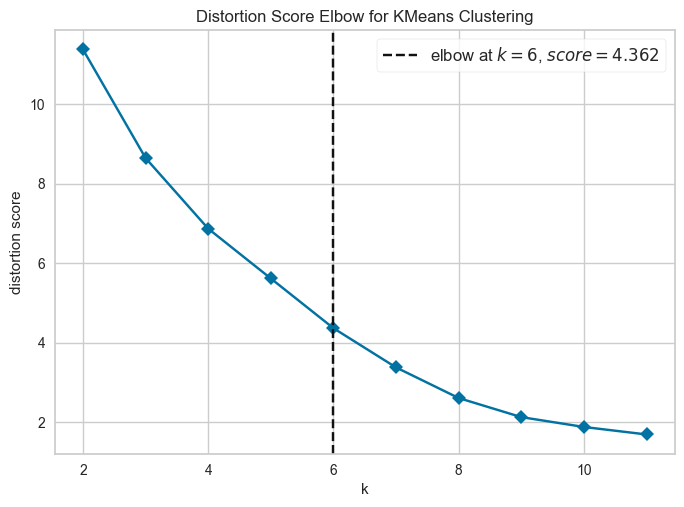

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
# # Elbow Method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#Realizamos el análisis del codo con la herramienta KElbowVisualizer
model = KMeans()
k = KElbowVisualizer(model, k=(2,12), timings=False)
k.fit(ventas_KM)
k.show()

In [46]:
# Seleccionar el valor de k óptimo
#k_optimo = k.elbow_value_
k_optimo = 6

# Entrenar el modelo con el valor de k óptimo
model = KMeans(n_clusters=k_optimo,random_state=4)
model.fit(ventas_KM)

# Obtener las etiquetas de clúster para cada muestra
labels = model.labels_

# Obtener los centroides de cada clúster
centroids = model.cluster_centers_

/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Aplicamos PCA para visualizar los clusters

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
X = StandardScaler().fit_transform(ventas_KM)

In [49]:
X = ventas_KM

In [50]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

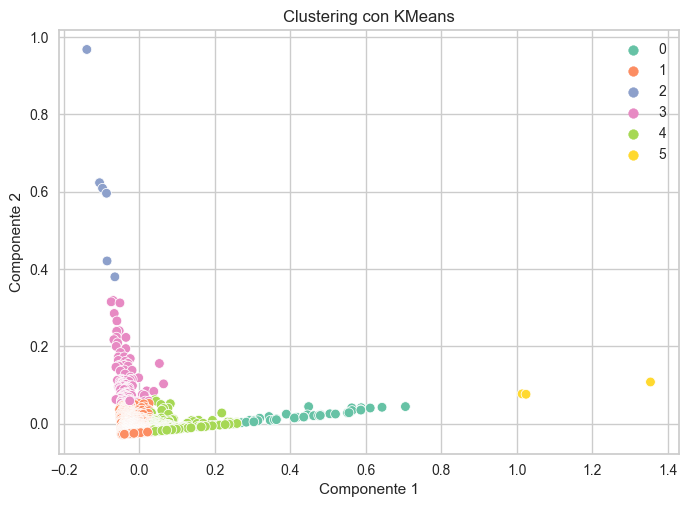

In [51]:
# Graficar los clústeres resultantes del modelo KMeans
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=labels, palette='Set2')
#sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', s=100)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Clustering con KMeans')
plt.show()

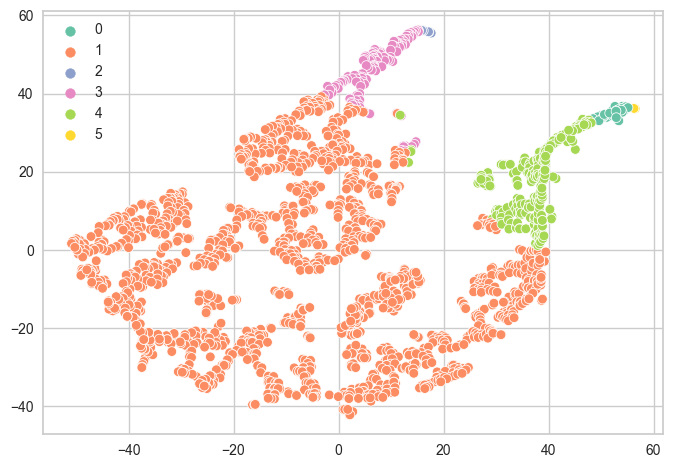

In [52]:
from sklearn.manifold import TSNE
X_dim2 = TSNE(n_components=2,random_state=4).fit_transform(X)
sns.scatterplot(x=X_dim2[:, 0], y=X_dim2[:, 1], hue=labels,palette='Set2')
plt.show()

In [53]:
VentasP1['Etiqueta'] = labels
columnas_eliminar = [8]
VentasP1 = VentasP1.drop(VentasP1.columns[columnas_eliminar], axis=1)

In [54]:
Grupos1 = VentasP1.groupby('Etiqueta')

In [55]:
medias = Grupos1[['no_ventas', 'CostPrice','Ganancia']].mean()
varianza = Grupos1[['no_ventas', 'CostPrice','Ganancia']].std()

In [56]:
print(medias)

           no_ventas    CostPrice    Ganancia
Etiqueta                                     
0           4.666667   825.063889  190.572222
1          15.725718    53.197936   15.141222
2         635.333333    18.841667    7.491667
3         138.063492    45.052087   12.997988
4          10.948598   198.539953   55.629206
5           6.000000  1868.000000  467.000000


In [57]:
print(varianza)

           no_ventas   CostPrice   Ganancia
Etiqueta                                   
0           5.286100  210.491861  53.818709
1          16.607615   27.019856   7.528334
2         211.066498   11.443357   3.978746
3          61.946654   29.299917   9.286240
4          13.693224   94.779279  24.818800
5           1.000000  304.945897  76.236474


## Análisis de los clusters

* Grupo 0

In [58]:
Grupos1.get_group(0).head()

,StockID,no_ventas,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
472,647,27,SONRICS,CAJA sonrics piñata surprise c/6,1,0,793.8,0,27.0,199.2,0
839,1056,13,ANGUIPLAST,BULTO vitabag biodegradable grande cafe 25k,0,1,972.5,1,72.0,243.5,0
867,2147,13,LA ESPERANZA,CAJA la esperanza micros grande 2kg c/6,1,0,700.0,0,9.0,175.0,0
970,2306,11,DART,CAJA dart tapa 60RLM c/300,1,0,625.8,0,0.0,157.2,0
976,1665,11,DART,CAJA dart 60JY60 c/300,1,0,978.0,0,0.0,262.0,0


In [112]:
stock[stock['StockID'] == 2147]

,StockID,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,BarCode,PriceList,QtyAvailable,QtyAvailableForStore,VersionSync,AverageSaleQty,CommentWhenAvailableForStore
2146,2147,LA ESPERANZA,CAJA la esperanza micros grande 2kg c/6,1,0,700.0,0,21470,875.0,0,0,171889,9.0,NO DISPONIBLE (NO PROGRAMADO)


In [59]:
Grupos1.get_group(0).describe()

,StockID,no_ventas,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,1824.972222,4.666667,0.694444,0.166667,825.063889,0.111111,1558.611111,190.572222,0.0
std,880.831376,5.286100,0.467177,0.377964,210.491861,0.318728,9289.995874,53.818709,0.0
min,24.000000,1.000000,0.000000,0.000000,510.000000,0.000000,0.000000,64.400000,0.0
25%,1112.250000,1.000000,0.000000,0.000000,643.500000,0.000000,0.000000,148.125000,0.0
50%,2084.500000,3.000000,1.000000,0.000000,836.000000,0.000000,0.000000,179.000000,0.0
75%,2593.000000,6.000000,1.000000,0.000000,973.875000,0.000000,4.000000,240.875000,0.0
max,3015.000000,27.000000,1.000000,1.000000,1391.600000,1.000000,55750.000000,299.000000,0.0


Nos agrupa a los productos cuyas ventas son bajas, pero su precio es alto. Indagando un poco más en los productos de este grupo, nos damos cuenta que son productos agrupados en CAJA o BULTO. Esto nos da una idea de por qué sus ventas anuales de dichos productos son pocas y los precios altos, esto pues sabemos que es una tienda minorista.

* Grupo 1

In [60]:
Grupos1.get_group(1).head()

,StockID,no_ventas,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
135,1155,77,DIANA,"diana cerezas roja c/tallo chica 1,150kg",0,0,95.00,6,0.00000,24.00,1
136,1288,75,LILI,"lili galletas con nuez 238,5gr",0,0,46.30,1,0.00000,13.70,1
137,288,75,SOL,sol cacahuate tipo español normal 1kg,0,0,65.80,1,79.00000,17.20,1
138,1396,75,RICOLINO,ricolino duvalin 3av/fr/va 60pz 600gr exhibidor,0,0,76.68,1,0.00000,19.32,1
139,1023,75,PAYASO,payaso bomba infladora manual,0,0,32.00,5,12.00001,8.00,1


In [61]:
Grupos1.get_group(1).describe()

,StockID,no_ventas,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
count,1637.000000,1637.000000,1637.000000,1637.0,1637.000000,1637.000000,1637.000000,1637.000000,1637.0
mean,1500.288943,15.725718,0.001222,0.0,53.197936,1.660965,1593.565058,15.141222,1.0
std,894.144028,16.607615,0.034943,0.0,27.019856,12.887913,16180.757540,7.528334,0.0
min,3.000000,1.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.500000,1.0
25%,722.000000,4.000000,0.000000,0.0,33.500000,1.000000,0.000000,9.800000,1.0
50%,1460.000000,9.000000,0.000000,0.0,49.800000,1.000000,0.000000,14.000000,1.0
75%,2314.000000,21.000000,0.000000,0.0,67.000000,1.000000,21.000000,19.000000,1.0
max,3041.000000,77.000000,1.000000,0.0,144.000000,500.000000,312907.000000,50.000000,1.0


En este grupo contamos con aquellos productos que tienen ventas bajos y precios bajos. Esto nos indica que son productos que no son muy demandados por los clientes. Por consecuencia, el dueño de la tienda debería de considerar la posibilidad de retirarlos de su inventario o tener poco inventario de los mismos debido a que no son muy rentables.

* Grupo 2

In [62]:
Grupos1.get_group(2)

,StockID,no_ventas,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
0,66,1009,CLASSY,classy cuchara pastelera bio 50pz,0,0,9.60,60,2003.0,3.40,2
1,68,660,CLASSY,classy cuchara SOPERA bio 25pz,0,0,10.65,40,1694.0,4.35,2
2,1187,645,REYMA,reyma 6 plato pastelero bio 25pz,0,0,15.70,20,0.0,8.30,2
3,79,631,REYMA,reyma 8oz vaso plastico 50pz,0,0,26.00,20,1532.0,13.00,2
4,118,455,DART,dart 10JY10 blanco 25pz,0,0,12.30,40,1260.0,4.70,2
5,2295,412,TOTIS,totis donitas limon y sal sobrecito 25pz,0,0,38.80,1,460.0,11.20,2


In [63]:
Grupos1.get_group(2).describe()

,StockID,no_ventas,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
count,6.000000,6.000000,6.0,6.0,6.000000,6.000000,6.000000,6.000000,6.0
mean,635.500000,635.333333,0.0,0.0,18.841667,30.166667,1158.166667,7.491667,2.0
std,925.416393,211.066498,0.0,0.0,11.443357,20.692189,771.980419,3.978746,0.0
min,66.000000,412.000000,0.0,0.0,9.600000,1.000000,0.000000,3.400000,2.0
25%,70.750000,499.000000,0.0,0.0,11.062500,20.000000,660.000000,4.437500,2.0
50%,98.500000,638.000000,0.0,0.0,14.000000,30.000000,1396.000000,6.500000,2.0
75%,919.750000,656.250000,0.0,0.0,23.425000,40.000000,1653.500000,10.475000,2.0
max,2295.000000,1009.000000,0.0,0.0,38.800000,60.000000,2003.000000,13.000000,2.0


En este grupo nos encontramos con productos que tienen ventas anuales muy altas, pero su precio es bajo. Esto nos da una idea de que son productos que se venden en gran cantidad, pero que no son muy caros. Al indagar un poco más en los productos de este grupo, nos damos cuenta que son productos de materias primas que son de uso cotidiano como cucharas y platos de plástico. No obstante también contamos con totis que son un producto de comida que se vende en gran cantidad y es barato.

* Grupo 3

In [64]:
Grupos1.get_group(3).sort_values(by='CostPrice', ascending=True)

,StockID,no_ventas,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
102,2607,91,MAPPOSA,20x30 mapposa rollo poliseda,0,0,0.068,500,0.0,0.029,3
31,69,177,CLASSY,classy tenedor pastelero bio 50pz,0,0,9.180,60,584.0,3.820,3
16,71,249,CLASSY,classy tenedor SOPERO bio 25pz,0,0,10.650,40,1754.0,4.350,3
45,1640,143,DART,dart 8JY8 blanco 25pz,0,0,11.020,1,0.0,3.980,3
65,332,125,FABOLSA,pb bolsa papel #1 100pz,0,0,15.000,10,193.0,4.000,3
...,...,...,...,...,...,...,...,...,...,...,...
86,1743,105,REYMA,reyma pelicula 30cm clingfilm 600mt,0,0,123.750,4,0.0,49.250,3
80,2251,108,TUTSI,tutsi pop 50pz 1kg,0,0,128.900,1,0.0,33.100,3
124,1384,81,BREMEN,"CAJA bremen tapon 1kg 1,170gr",1,0,136.000,0,0.0,34.000,3
69,314,122,FERRERO,ferrero rocher 24pz 300gr,0,0,162.900,1,86.0,61.100,3


In [65]:
Grupos1.get_group(3).describe()

,StockID,no_ventas,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
count,126.000000,126.000000,126.000000,126.0,126.000000,126.00000,1.260000e+02,126.000000,126.0
mean,999.507937,138.063492,0.007937,0.0,45.052087,50.34127,2.029951e+04,12.997988,3.0
std,840.299754,61.946654,0.089087,0.0,29.299917,446.72732,1.593780e+05,9.286240,0.0
min,1.000000,64.000000,0.000000,0.0,0.068000,0.00000,0.000000e+00,0.029000,3.0
25%,313.250000,95.250000,0.000000,0.0,23.956250,1.00000,0.000000e+00,7.025000,3.0
50%,767.000000,122.000000,0.000000,0.0,38.830000,3.50000,5.200000e+01,11.700000,3.0
75%,1613.000000,163.000000,0.000000,0.0,54.697500,10.00000,1.920000e+02,15.317500,3.0
max,2976.000000,351.000000,1.000000,0.0,164.060000,5000.00000,1.696204e+06,61.100000,3.0


Este es un grupo segmentado en aquellos productos que no venden poco, pero tampoco venden mucho. Además, sus precios son bajos. Esto nos indica que son productos medianamente demandados por los clientes y que no son muy caros.

* Grupo 4

In [66]:
Grupos1.get_group(4)

,StockID,no_ventas,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
116,1250,83,REYMA,reyma contenedor bio 7x7 liso 50pz,0,0,135.00,4,0.0,47.00,4
129,222,79,LA CONCHA,rollo playo grande 46cm,0,0,165.00,8,17.0,42.00,4
157,2630,69,KLASS COMPANY,"klass winis fiesta 150pz 1,5kg",0,0,170.00,1,0.0,50.00,4
159,2780,69,VERO,"vero mix clasico 1,5kg piñatero",0,0,116.51,1,0.0,83.49,4
197,2051,58,PREMIER PRODUCTOS,premier pistache tostado 1kg,0,0,212.00,1,0.0,53.00,4
...,...,...,...,...,...,...,...,...,...,...,...
2059,1919,1,INIX,inix 3525-12 5pz,0,0,150.00,1,0.0,38.00,4
2061,409,1,LA CONCHA,CAJA madera palillos 1kg,1,0,178.00,1,16.0,45.00,4
2064,1313,1,NAVIEMPAQUES,naviempaques hielera 47L grande,0,0,220.00,1,79.0,55.00,4
2069,279,1,HERSHEY´S,"hersheys pelon garrafa 5,2kg",0,0,380.00,0,0.0,76.00,4


In [67]:
Grupos1.get_group(4).describe()

,StockID,no_ventas,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.0
mean,1619.546729,10.948598,0.126168,0.028037,198.539953,5.453271,367.336449,55.629206,4.0
std,830.373888,13.693224,0.332817,0.165467,94.779279,68.310017,4464.812898,24.818800,0.0
min,20.000000,1.000000,0.000000,0.000000,0.055900,0.000000,0.000000,26.016000,4.0
25%,956.500000,2.000000,0.000000,0.000000,145.200000,0.000000,0.000000,39.000000,4.0
50%,1631.000000,6.000000,0.000000,0.000000,170.000000,1.000000,0.000000,47.125000,4.0
75%,2344.750000,14.000000,0.000000,0.000000,212.600000,1.000000,4.750000,60.375000,4.0
max,3031.000000,83.000000,1.000000,1.000000,533.000000,1000.000000,64250.000000,175.000000,4.0


Este grupo nos agrupa a aquellos productos que tienen ventas anuales bajas y que no coinciden con ser CAJAS ni BULTOS completamente como en el grupo 0. Sin embargo, sus precios están máximo en 533 pesos. Esto nos indica que son productos que no son muy demandados por los clientes y que tienen un precio variado (no tan caro).

* Grupo 5

In [68]:
Grupos1.get_group(5)

,StockID,no_ventas,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
1233,1346,7,KLASS COMPANY,CAJA klass winis originales mini c/40,1,0,1684.0,0,3.0,421.0,5
1269,642,6,SOLO,CAJA solo vaso carton 10oz blanco 370 c1000,1,0,2220.0,0,11.0,555.0,5
1416,426,5,VALLADOLID,BULTO valladolid bio poliseda chica c/25,0,1,1700.0,0,43.0,425.0,5


In [69]:
Grupos1.get_group(5).describe()

,StockID,no_ventas,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,AverageSaleQty,Ganancia,Etiqueta
count,3.000000,3.0,3.000000,3.000000,3.000000,3.0,3.00000,3.000000,3.0
mean,804.666667,6.0,0.666667,0.333333,1868.000000,0.0,19.00000,467.000000,5.0
std,481.087657,1.0,0.577350,0.577350,304.945897,0.0,21.16601,76.236474,0.0
min,426.000000,5.0,0.000000,0.000000,1684.000000,0.0,3.00000,421.000000,5.0
25%,534.000000,5.5,0.500000,0.000000,1692.000000,0.0,7.00000,423.000000,5.0
50%,642.000000,6.0,1.000000,0.000000,1700.000000,0.0,11.00000,425.000000,5.0
75%,994.000000,6.5,1.000000,0.500000,1960.000000,0.0,27.00000,490.000000,5.0
max,1346.000000,7.0,1.000000,1.000000,2220.000000,0.0,43.00000,555.000000,5.0


Finalmente tenemos a aquellos productos que tienen ventas anuales demasiado bajas entre 5 y 7 unidades anuales. No obstante los precios de estos productos son muy altos y por ende las ganancias que se obtienen de estos son igualmente altas.

#### Impacto en el negocio

In [135]:
for group in range(6):
    f = lambda x: x['no_ventas'] * x['CostPrice']
    h = lambda x: x['no_ventas'] * x['Ganancia']
    costo_anual = Grupos1.get_group(group).apply(f, axis=1).sum()
    ganancia_anual = Grupos1.get_group(group).apply(h, axis=1).sum()

    print(f'Costos y ganancias anuales de los productos del grupo {group}')
    print(f'El costo de todos los productos de este grupo es: ${costo_anual:.2f}')
    print(f'La ganancia total de todos los productos de este grupo es : ${ganancia_anual:.2f}')
    print(f'Estamos generando un margen de ganancia anual del {ganancia_anual/costo_anual:.2%}')
    print(f'Ventas anuales totales : {Grupos1.get_group(group)["no_ventas"].sum()}')
    print()

Costos y ganancias anuales de los productos del grupo 0
El costo de todos los productos de este grupo es: $138243.20
La ganancia total de todos los productos de este grupo es : $34238.70
Estamos generando un margen de ganancia anual del 24.77%
Ventas anuales totales : 168

Costos y ganancias anuales de los productos del grupo 1
El costo de todos los productos de este grupo es: $1320474.25
La ganancia total de todos los productos de este grupo es : $373220.69
Estamos generando un margen de ganancia anual del 28.26%
Ventas anuales totales : 25743

Costos y ganancias anuales de los productos del grupo 2
El costo de todos los productos de este grupo es: $64830.00
La ganancia total de todos los productos de este grupo es : $26611.00
Estamos generando un margen de ganancia anual del 41.05%
Ventas anuales totales : 3812

Costos y ganancias anuales de los productos del grupo 3
El costo de todos los productos de este grupo es: $744535.80
La ganancia total de todos los productos de este grupo es

### Aplicación del algoritmo para ventas_KM1

/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

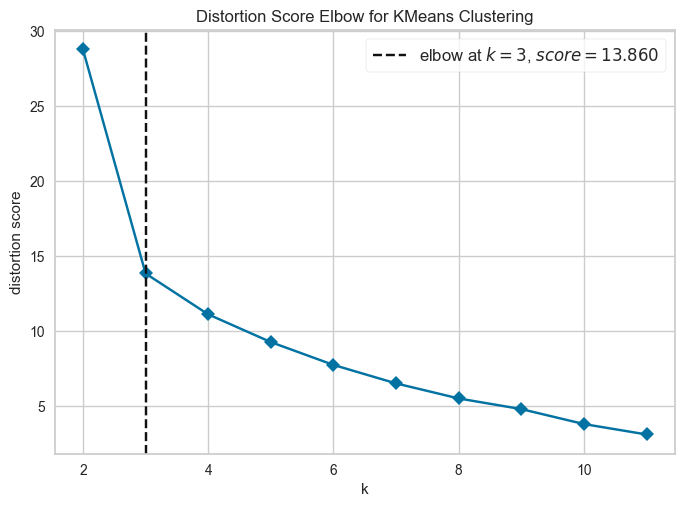

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
#Realizamos el análisis del codo con la herramienta KElbowVisualizer
model = KMeans()
k = KElbowVisualizer(model, k=(2,12), timings=False)
k.fit(ventas_KM1)
k.show()

In [71]:
# Seleccionar el valor de k óptimo
k_optimo = k.elbow_value_

# Entrenar el modelo con el valor de k óptimo
model = KMeans(n_clusters=k_optimo,random_state=4)
model.fit(ventas_KM1)

# Obtener las etiquetas de clúster para cada muestra
labels = model.labels_

# Obtener los centroides de cada clúster
centroids = model.cluster_centers_

/Users/danielmalvaez/opt/anaconda3/envs/py/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
X = StandardScaler().fit_transform(ventas_KM1)

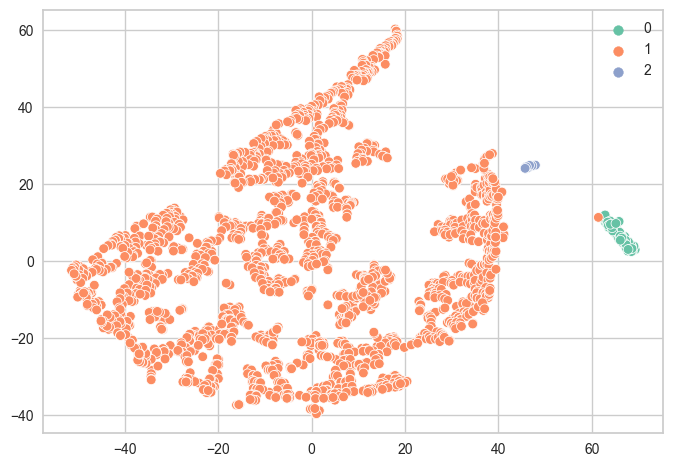

In [73]:
X_dim2 = TSNE(n_components=2,random_state=4).fit_transform(X)
sns.scatterplot(x=X_dim2[:, 0], y=X_dim2[:, 1], hue=labels,palette='Set2')
plt.show()

In [74]:
VentasP1['Etiqueta'] = labels
columnas_eliminar = [8]
VentasP1 = VentasP1.drop(VentasP1.columns[columnas_eliminar], axis=1)

In [75]:
Grupos = VentasP1.groupby('Etiqueta')

In [76]:
Grupos.get_group(2)

,StockID,no_ventas,Familly,Item,CAJA_onehot,BULTO_onehot,CostPrice,QtyMinimum,Ganancia,Etiqueta
639,516,19,REYMA,BULTO reyma 105 c/500,0,1,333.00,0,84.00,2
783,268,15,REYMA,BULTO reyma 9H BLANCA c/200,0,1,390.96,0,98.04,2
839,1056,13,ANGUIPLAST,BULTO vitabag biodegradable grande cafe 25k,0,1,972.50,1,243.50,2
1268,2790,6,MAPPOSA,BULTO mapposa basura grande 60x90 c/25,0,1,1008.00,0,253.00,2
1311,2617,6,ANGUIPLAST,BULTO vitabag biodegradable med cafe c/25,0,1,972.50,0,243.50,2
1370,448,5,ZULKA,BULTO zulka azucar refinada de caña c/10,0,1,259.00,0,65.00,2
1416,426,5,VALLADOLID,BULTO valladolid bio poliseda chica c/25,0,1,1700.00,0,425.00,2
1467,2708,5,MAPPOSA,BULTO mapposa basura jumbo 90x120 c/25,0,1,1008.00,0,253.00,2
1594,659,3,GAMESA,BULTO gamesa animalitos c/6kg,0,1,302.00,0,89.20,2
1794,2061,2,REYMA,BULTO reyma 9H BIO c/200,0,1,510.00,0,128.00,2
